# Assignment: Phishing websites

Marja Satukangas - 1.2.2021

The goal of this assesment is to construct a small useful decision tree that predicts whether a website is aphishing site or not. 

Data source:https://archive.ics.uci.edu/ml/datasets/phishing+websites

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import graphviz

from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
#reading data

data = pd.read_csv("C:/Users/Marja/Downloads/phishing.csv", sep=';')
df = pd.DataFrame(data)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Check how many values we have on each column
df.count()

having_IP_Address              11055
URL_Length                     11055
Shortining_Service             11055
having_At_Symbol               11055
double_slash_redirecting       11055
Prefix_Suffix                  11055
having_Sub_Domain              11055
SSLfinal_State                 11055
Domain_registeration_length    11055
Favicon                        11055
port                           11055
HTTPS_token                    11055
Request_URL                    11055
URL_of_Anchor                  11055
Links_in_tags                  11055
SFH                            11055
Submitting_to_email            11055
Abnormal_URL                   11055
Redirect                       11055
on_mouseover                   11055
RightClick                     11055
popUpWindow                    11055
Iframe                         11055
age_of_domain                  11055
DNSRecord                      11055
web_traffic                    11055
Page_Rank                      11055
G

In [4]:
#missing values?
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [5]:
#encoding data
enc = OneHotEncoder(drop='if_binary').fit(df)
enc_data = enc.transform(df).toarray()

colnames = enc.get_feature_names(df.columns.values)

enc_df = pd.DataFrame(enc_data, columns=colnames)

enc_df.columns

Index(['having_IP_Address_1', 'URL_Length_-1', 'URL_Length_0', 'URL_Length_1',
       'Shortining_Service_1', 'having_At_Symbol_1',
       'double_slash_redirecting_1', 'Prefix_Suffix_1', 'having_Sub_Domain_-1',
       'having_Sub_Domain_0', 'having_Sub_Domain_1', 'SSLfinal_State_-1',
       'SSLfinal_State_0', 'SSLfinal_State_1', 'Domain_registeration_length_1',
       'Favicon_1', 'port_1', 'HTTPS_token_1', 'Request_URL_1',
       'URL_of_Anchor_-1', 'URL_of_Anchor_0', 'URL_of_Anchor_1',
       'Links_in_tags_-1', 'Links_in_tags_0', 'Links_in_tags_1', 'SFH_-1',
       'SFH_0', 'SFH_1', 'Submitting_to_email_1', 'Abnormal_URL_1',
       'Redirect_1', 'on_mouseover_1', 'RightClick_1', 'popUpWindow_1',
       'Iframe_1', 'age_of_domain_1', 'DNSRecord_1', 'web_traffic_-1',
       'web_traffic_0', 'web_traffic_1', 'Page_Rank_1', 'Google_Index_1',
       'Links_pointing_to_page_-1', 'Links_pointing_to_page_0',
       'Links_pointing_to_page_1', 'Statistical_report_1', 'Result_1'],
      dty

In [6]:
# Split the data into train (80%) and test datasets (20%)
train_dataset = enc_df.sample(frac=0.8, random_state=0)
test_dataset = enc_df.drop(train_dataset.index)

In [7]:
# Separate the features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# pop takes 
train_labels = train_features.pop('Result_1')
test_labels = test_features.pop('Result_1')


In [8]:
# Decision tree classifyer (min samples 5000)

classifier = tree.DecisionTreeClassifier(min_samples_split=5000)
classifier.fit(train_features, train_labels)


DecisionTreeClassifier(min_samples_split=5000)

## 1. Decision tree

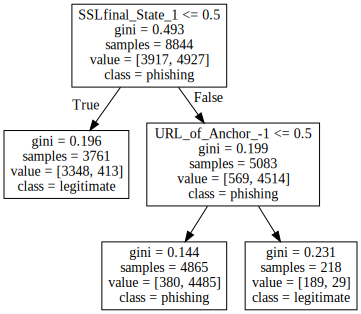

In [9]:
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=train_features.columns, class_names=['legitimate','phishing'])
graph = graphviz.Source(dot_data) 
graph

## 2. Instructions to analyze whether the website is likely to be a phising site or not 

1. Check if website uses https.

2. If website uses https, the website is considered to be **legitimate**.

3. If it doesnt't use https, check url of anchor. An anchor is an element defined by the a-tag. Most of the a-tags should have same domain names as the website. Sometimes achors are not linked to any webpages.

4. If more or as much as 31% of anchors have different domain names or they don't have link to any webpage, the website is considered to be a **phishing site**. Otherwise it is considered to be **legitimate** by the model.


## 3. Accuracy

Accuracy of the model is 0.90 with a test set that hasn't been used for training. Below the accuracy score has been calculated for different kinds of models. Even tough we take more complicated model, the accuracy really doesn't get better.

If we don't give any restrictions to the model, the accuracy is 0.96 but then the model is so complicated that it is really hard to use it for predictions manually.

In [10]:
# Accuracy score of the model used
predictions=classifier.predict(test_features)
accuracy_score(test_labels, predictions)

0.9032112166440525

In [11]:
#Accuracy score without restrictions
classifier = tree.DecisionTreeClassifier().fit(train_features, train_labels)

predictions=classifier.predict(test_features)
accuracy_score(test_labels, predictions)

0.9611035730438715

In [12]:
#Accuracy score min samples 500

classifier = tree.DecisionTreeClassifier(min_samples_split=500).fit(train_features, train_labels)

predictions=classifier.predict(test_features)
accuracy_score(test_labels, predictions)

0.9136137494346449